In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [8]:
#Import our dependencies and initialize counters and an empty list that will hold the weather data.
#Loop through the cities list.
#Group the cities in sets of 50 to log the process as we find the weather data for each city.
#Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
#Build the city_url or endpoint for each city.
#Log the URL and the record and set numbers.
#Make an API request for each city.
#Parse the JSON weather data for the following:
#City, country, and date
#Latitude and longitude
#Maximum temperature
#Humidity
#Cloudiness
#Wind speed
#Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [16]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 20 of Set 25 | vila velha
Processing Record 21 of Set 25 | puerto ayora
Processing Record 22 of Set 25 | albany
Processing Record 23 of Set 25 | mataura
Processing Record 24 of Set 25 | soe
Processing Record 25 of Set 25 | kodiak
Processing Record 26 of Set 25 | tlahualilo
City not found. Skipping...
Processing Record 27 of Set 25 | rikitea
Processing Record 28 of Set 25 | carnarvon
Processing Record 29 of Set 25 | atar
Processing Record 30 of Set 25 | barrow
Processing Record 31 of Set 25 | podgornoye
Processing Record 32 of Set 25 | ushuaia
Processing Record 33 of Set 25 | talnakh
Processing Record 34 of Set 25 | rundu
Processing Record 35 of Set 25 | punta arenas
Processing Record 36 of Set 25 | kavaratti
Processing Record 37 of Set 25 | killybegs
Processing Record 38 of Set 25 | nikolsk
Processing Record 39 of Set 25 | saskylakh
Processing Record 40 of Set 25 | tuktoyaktuk
Processing Record 41 of Set 25 | port elizabeth
Processing Record 42 of Set 25 | bredasdorp


Processing Record 37 of Set 28 | katherine
Processing Record 38 of Set 28 | morozovsk
Processing Record 39 of Set 28 | saldanha
Processing Record 40 of Set 28 | tiksi
Processing Record 41 of Set 28 | geraldton
Processing Record 42 of Set 28 | khatanga
Processing Record 43 of Set 28 | saint-philippe
Processing Record 44 of Set 28 | omboue
Processing Record 45 of Set 28 | xichang
Processing Record 46 of Set 28 | mezhova
Processing Record 47 of Set 28 | viligili
City not found. Skipping...
Processing Record 48 of Set 28 | constitucion
Processing Record 49 of Set 28 | faanui
Processing Record 50 of Set 28 | katrineholm
Processing Record 1 of Set 29 | upernavik
Processing Record 2 of Set 29 | aguimes
Processing Record 3 of Set 29 | marcona
City not found. Skipping...
Processing Record 4 of Set 29 | cabedelo
Processing Record 5 of Set 29 | broome
Processing Record 6 of Set 29 | baykit
Processing Record 7 of Set 29 | makanya
Processing Record 8 of Set 29 | sheridan
Processing Record 9 of Set 

Processing Record 23 of Set 32 | potsdam
Processing Record 24 of Set 32 | praya
Processing Record 25 of Set 32 | humaita
Processing Record 26 of Set 32 | paamiut
Processing Record 27 of Set 32 | ugoofaaru
Processing Record 28 of Set 32 | isabela
Processing Record 29 of Set 32 | dondo
Processing Record 30 of Set 32 | mortka
Processing Record 31 of Set 32 | ormara
Processing Record 32 of Set 32 | nelson bay
Processing Record 33 of Set 32 | kipushi
Processing Record 34 of Set 32 | kuah
Processing Record 35 of Set 32 | takhtamygda
Processing Record 36 of Set 32 | guilin
Processing Record 37 of Set 32 | maloy
Processing Record 38 of Set 32 | andarab
City not found. Skipping...
Processing Record 39 of Set 32 | ardmore
Processing Record 40 of Set 32 | inuvik
Processing Record 41 of Set 32 | malartic
Processing Record 42 of Set 32 | anchorage
Processing Record 43 of Set 32 | havelock
Processing Record 44 of Set 32 | tabiauea
City not found. Skipping...
Processing Record 45 of Set 32 | aykhal
P

Processing Record 8 of Set 36 | pangnirtung
Processing Record 9 of Set 36 | maebaru
Processing Record 10 of Set 36 | duvan
Processing Record 11 of Set 36 | mount isa
Processing Record 12 of Set 36 | longlac
City not found. Skipping...
Processing Record 13 of Set 36 | matadi
Processing Record 14 of Set 36 | te anau
Processing Record 15 of Set 36 | itoman
Processing Record 16 of Set 36 | minnedosa
Processing Record 17 of Set 36 | guaramirim
Processing Record 18 of Set 36 | tallahassee
Processing Record 19 of Set 36 | oktyabrskiy
Processing Record 20 of Set 36 | isangel
Processing Record 21 of Set 36 | opava
Processing Record 22 of Set 36 | markova
Processing Record 23 of Set 36 | alotau
City not found. Skipping...
Processing Record 24 of Set 36 | ourem
Processing Record 25 of Set 36 | yanan
City not found. Skipping...
Processing Record 26 of Set 36 | dicabisagan
Processing Record 27 of Set 36 | ferrol
Processing Record 28 of Set 36 | zhangjiakou
Processing Record 29 of Set 36 | joensuu
P

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vila Velha,-20.3297,-40.2925,80.55,57,20,5.75,BR,2022-05-10 13:35:33
1,Puerto Ayora,-0.7393,-90.3518,75.54,89,57,7.72,EC,2022-05-10 13:35:33
2,Albany,42.6001,-73.9662,59.95,29,2,1.01,US,2022-05-10 13:35:34
3,Mataura,-46.1927,168.8643,37.81,97,10,2.06,NZ,2022-05-10 13:35:34
4,Soe,-9.8607,124.2840,63.61,86,30,3.20,ID,2022-05-10 13:35:34
5,Kodiak,57.7900,-152.4072,38.71,56,20,13.80,US,2022-05-10 13:31:43
6,Rikitea,-23.1203,-134.9692,76.23,74,4,13.13,PF,2022-05-10 13:32:32
7,Carnarvon,-24.8667,113.6333,71.67,73,97,5.75,AU,2022-05-10 13:35:38
8,Atar,20.5169,-13.0499,106.63,5,91,12.44,MR,2022-05-10 13:35:38
9,Barrow,71.2906,-156.7887,26.62,86,100,21.85,US,2022-05-10 13:31:49


In [22]:
city_data_df_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df =city_data_df[city_data_df_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vila Velha,BR,2022-05-10 13:35:33,-20.3297,-40.2925,80.55,57,20,5.75
1,Puerto Ayora,EC,2022-05-10 13:35:33,-0.7393,-90.3518,75.54,89,57,7.72
2,Albany,US,2022-05-10 13:35:34,42.6001,-73.9662,59.95,29,2,1.01
3,Mataura,NZ,2022-05-10 13:35:34,-46.1927,168.8643,37.81,97,10,2.06
4,Soe,ID,2022-05-10 13:35:34,-9.8607,124.2840,63.61,86,30,3.20


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

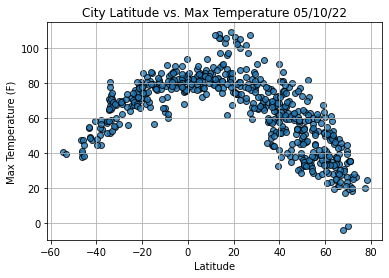

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

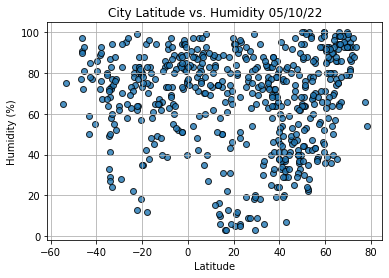

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

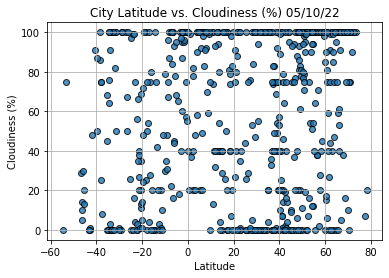

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

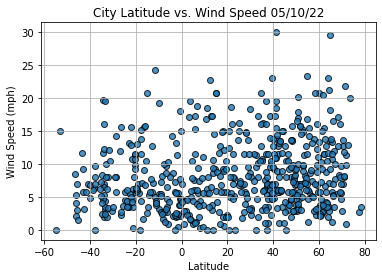

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()
